In [12]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
#pickel load data/grodzisko_20230111/cache/calibration_pairs.pkl
with open('data/grodzisko_20230111/cache/calibration_pairs.pkl', 'rb') as f:
    pairs = pickle.load(f)

In [14]:
#create dataframe from pairs[0] and pairs[1]
df = pd.DataFrame({'i': pairs[0], 'j': pairs[1]})

In [15]:

#get row where i=80, and j=134
idx = df.loc[(df['i'] == 80) & (df['j'] == 134)].index[0]
i_img = pairs[3][idx]
j_img = pairs[4][idx]
mask = pairs[5][idx]
#set img values to nan where mask is 0
i_img[mask == 0] = np.nan
j_img[mask == 0] = np.nan
diff = i_img-j_img
#calculate common min max
min_val = np.nanmin([i_img, j_img])
max_val = np.nanmax([i_img, j_img])

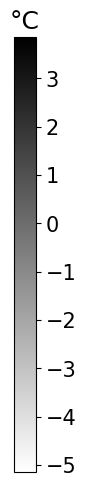

In [38]:
#3 subplots
#plot image at ax[0]
plt.imshow(i_img, vmin=min_val, vmax=max_val, cmap='gray_r')

#dont show axis
plt.axis('off')
# ax = plt.gca()
# ax.set_xticks([0, i_img.shape[1]])
# ax.set_yticks([0, i_img.shape[0]])
# ax.xaxis.tick_top()
# ax.tick_params(axis='both', which='both', length=0)
# #remove borders
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
#fit canvas to image
plt.tight_layout()
plt.savefig('pair_i.png', bbox_inches='tight', dpi=200, pad_inches=0)
#clear plot
plt.clf()
plt.imshow(j_img, vmin=min_val, vmax=max_val, cmap='gray_r')
plt.axis('off')
plt.tight_layout()
#save img with tight layout
plt.savefig('pair_j.png', bbox_inches='tight', dpi=200, pad_inches=0)
cbar = plt.colorbar()
cbar.ax.set_title("°C")
plt.gca().remove()
#set bigger letters
plt.rcParams.update({'font.size': 15})
#save colorbar
plt.savefig('pair_colorbar.png', bbox_inches='tight', dpi=200, pad_inches=0)

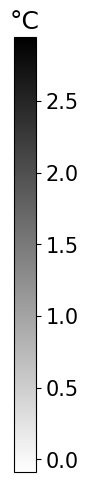

In [36]:
plt.imshow(diff, cmap='gray_r')
plt.axis('off')
plt.tight_layout()
plt.savefig('diff.png', bbox_inches='tight', dpi=200, pad_inches=0)
cbar = plt.colorbar()
cbar.ax.set_title("°C")
ax = plt.gca()
ax.remove()
plt.rcParams.update({'font.size': 15})
plt.savefig('diff_colorbar.png', bbox_inches='tight', dpi=200, pad_inches=0)

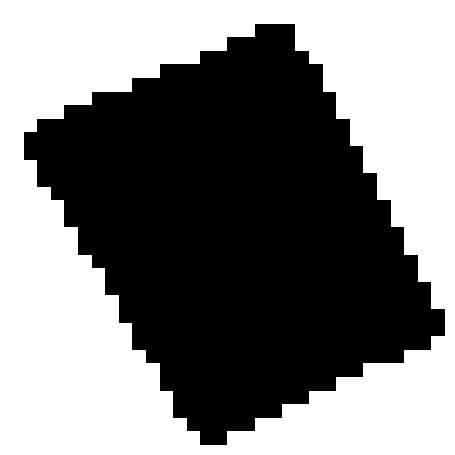

In [19]:
#3 subplots
#plot image at ax[0]
plt.imshow(mask*(-1), cmap='gray')
plt.axis('off')
# ax = plt.gca()
# ax.set_xticks([0, j_img.shape[1]])
# ax.set_yticks([0, j_img.shape[0]])
# ax.xaxis.tick_top()
# ax.tick_params(axis='both', which='both', length=0)
plt.tight_layout()
plt.savefig('mask.png', bbox_inches='tight', dpi=200, pad_inches=0)

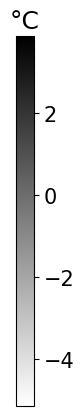

In [31]:
#ssave coorbar of xmin, xmax
plt.imshow(np.zeros((1, 1)), vmin=min_val, vmax=max_val, cmap='gray_r')
plt.axis('off')
cbar = plt.colorbar()
cbar.ax.set_title("°C")
ax = plt.gca()
ax.remove()
#set bigger letters
plt.rcParams.update({'font.size': 15})
#save colorbar
plt.savefig('colorbar.png', bbox_inches='tight', dpi=200, pad_inches=0)